## Kriminal glede na organizirano združbo

Pridobivanje podatkov za obravnavo

In [1]:
import pandas as pd
import glob
import warnings
import platform
from copy import copy
warnings.filterwarnings('ignore')

if (platform.system() == 'Windows'):
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('\\')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}
    
    # MAC IN LINUX IMATA DRUGACNE OZNAKE
else:
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('/')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('/')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [2]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [3]:
dataframes_copy = copy(dataframes)
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
all_data

# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []

# this dataframe is the one used for the analysis
full_KD = all_data

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    mesci2.append(mesci[int(mesec) - 1])


full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta
full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [4]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

seznam_PU = full_KD.PUStoritveKD.value_counts()

stevilo = [seznam_PU["PU KRANJ"], seznam_PU["PU NOVA GORICA"], seznam_PU["PU NOVO MESTO"], 0, 0, seznam_PU["PU KOPER"], seznam_PU["PU LJUBLJANA"]+seznam_PU["GPU"]
            , 0, seznam_PU["PU MARIBOR"], 0, seznam_PU["PU MURSKA SOBOTA"], 0]


slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kaznivih dejanj v Sloveniji po regijah', fontsize=20)
slovenia.plot(column='stevilo', cmap='RdYlGn', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=0, vmax=max(stevilo)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kaznivih dejanj', fontsize=15, rotation=270, labelpad=40)

ModuleNotFoundError: No module named 'geopandas'

### Priprava podatkov za prikaz kriminala glede na organizirano združbo

Grafa glede na vrednost organizirane zbružbe sta ločena (graf za DAm graf za NE), saj je le tako mogoč prikaz kriminala glede na ti dve vrednost.

In [ ]:
celota = full_KD.groupby("PUStoritveKD", sort=False).OrganiziranaZdruzba.value_counts()
celota_popravljeno = celota.drop(['DIREKTORAT ZA UPRAVNE NOTRANJE ZADEVE', 'NI PODATKA'])

stevilo_DA = [celota_popravljeno[11], celota_popravljeno[13], celota_popravljeno[7], 0, 0, celota_popravljeno[9], celota_popravljeno[3]+celota_popravljeno[17]
            , 0, celota_popravljeno[5], celota_popravljeno[1], celota_popravljeno[15], 0]

stevilo_NE =  [celota_popravljeno[10], celota_popravljeno[12], celota_popravljeno[6], 0, 0, celota_popravljeno[8], celota_popravljeno[2]+celota_popravljeno[16]
            , 0, celota_popravljeno[4], celota_popravljeno[0], celota_popravljeno[14], 0]


Prikaz grafa Slovenije za vrednost DA

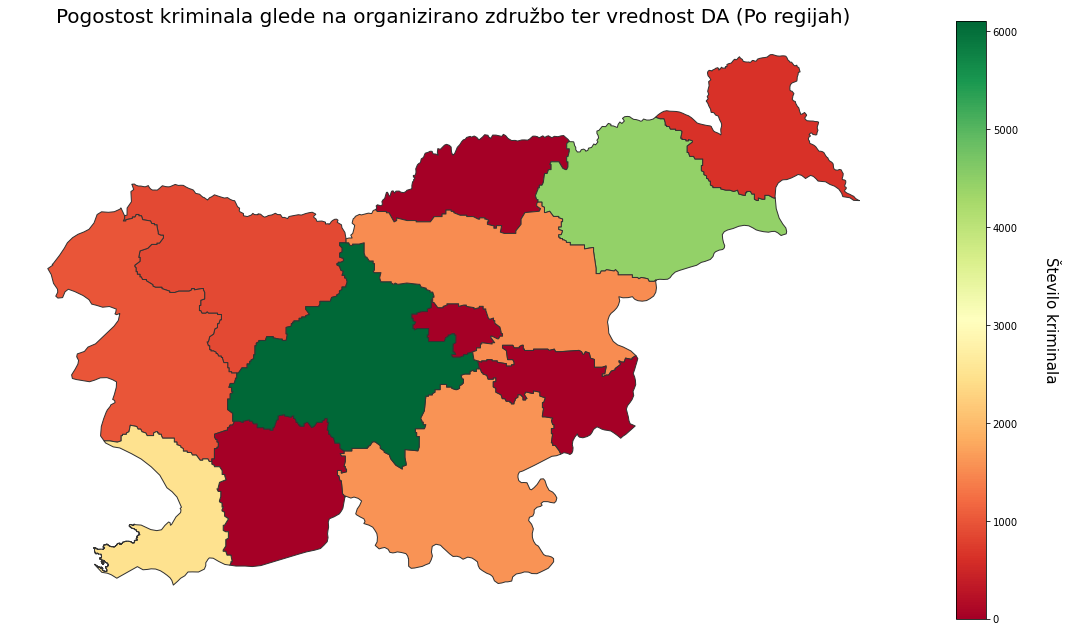

In [ ]:
slovenia = gpd.read_file('slovenija_map/regije/reg.shp', encoding='cp1250')

slovenia['stevilo'] = stevilo_DA
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kriminala glede na organizirano združbo ter vrednost DA (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='RdYlGn', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=0, vmax=max(stevilo_DA)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

Prikaz grafa Slovenije glede na vrednost NE

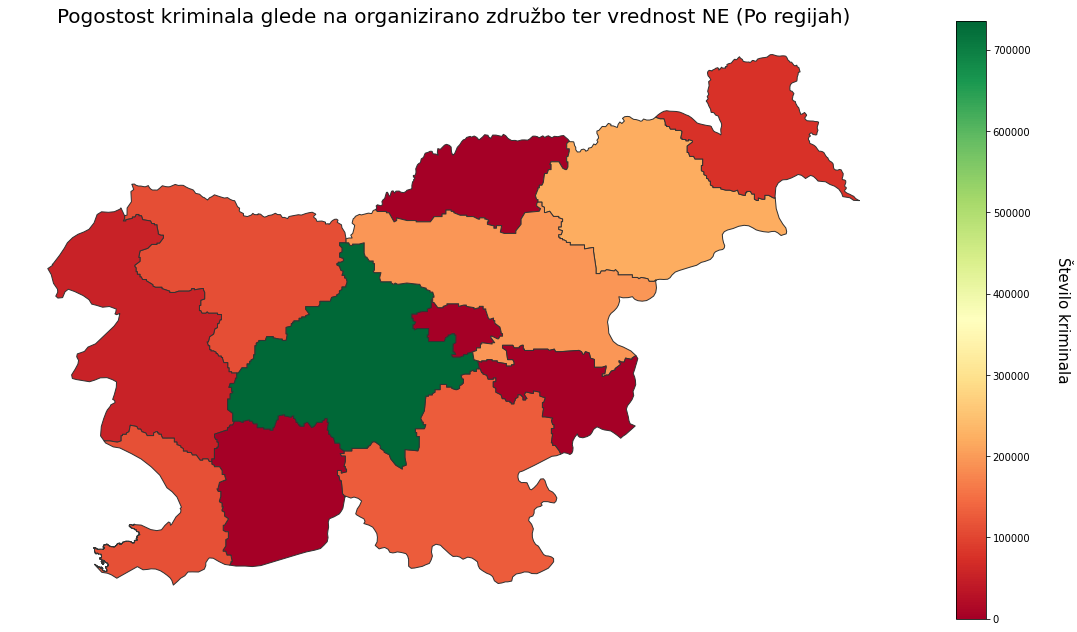

In [ ]:
slovenia['stevilo'] = stevilo_NE
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kriminala glede na organizirano združbo ter vrednost NE (Po regijah)', fontsize=20)
slovenia.plot(column='stevilo', cmap='RdYlGn', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=0, vmax=max(stevilo_NE)))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kriminala', fontsize=15, rotation=270, labelpad=40)

**ODGOVOR:** <br>Kot lahko opazimo iz prvega grafa lahko vidimo, da je na največ kriminala v Sloveniji, ki poteka v neki organizirani združbi, v osrednjeslovenski regiji, najmanj pa v Murski Soboti.
<br>Iz drugega grafa pa lahko opazimo, da je prav tako največ kriminala, ki ne poteka v organiziranih združbah, v osrednjeslovenski regiji, najmanj pa v Novi Gorici.

***OPOMNIK:*** Na grafu imamo vedno 4 regije, ki imajo vrednost 0, saj teh vrednosti za te regije, v naši tabeli, nismo imeli. <br>Regije za katere nismo imeli podatka v tabeli:
* Primorsko - notranjska regija,
* Zasavska regija,
* Posavska regija ter
* Koroška regija